In [1]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

In [2]:
data_df = pd.read_csv('data.csv')
data_df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
data_df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [4]:
data_df.dtypes.tolist()

[dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float6

In [5]:
data_df.groupby(by='Bankrupt?').count()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,,,,,,,,,,,,,,,,,,,,,
0,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,...,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599
1,220,220,220,220,220,220,220,220,220,220,...,220,220,220,220,220,220,220,220,220,220


In [6]:

nunique_values = data_df.nunique()

possible_indicators = nunique_values[nunique_values <= 10].index

# Display the columns that are potential indicators
print(f"Potential indicator variables: {possible_indicators}")

Potential indicator variables: Index(['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag'], dtype='object')


In [7]:
data_df[' Net Income Flag'].unique()

array([1])

In [8]:
data_df[' Liability-Assets Flag'].unique()

array([0, 1])

In [9]:
data_df.drop(columns=[' Net Income Flag'], inplace=True)

In [10]:
# Define test_df features set.
X = data_df.copy()
X = X.drop(columns=['Bankrupt?'], axis=1)

#X = X[X.columns.tolist()[:-1]]
X.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


In [11]:
# Define the target set.
y = data_df['Bankrupt?'].ravel()
y[:5]

array([1, 1, 1, 1, 1])

In [12]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
import sklearn as skl
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN


In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [14]:
columns_to_scale = X.columns.tolist()

columns_to_scale.remove(' Liability-Assets Flag')
#columns_to_scale.remove('Sentiment')
#columns_to_scale.remove('Scores')
#columns_to_scale.remove('Sentiment_stop')
#columns_to_scale.remove('Scores_stop')

In [40]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

ran = SMOTEENN(random_state=0)
X_train, y_train = ran.fit_resample(X_train, y_train)

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=200, activation="tanh", input_dim=94))

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=150, activation="tanh", input_dim=85))

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=150, activation="tanh", input_dim=80))

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=150, activation="tanh", input_dim=75))

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=150, activation="tanh", input_dim=70))

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=150, activation="tanh", input_dim=70))

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=150, activation="tanh", input_dim=70))




# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 200)               19000     
                                                                 
 dense_25 (Dense)            (None, 150)               30150     
                                                                 
 dense_26 (Dense)            (None, 150)               22650     
                                                                 
 dense_27 (Dense)            (None, 150)               22650     
                                                                 
 dense_28 (Dense)            (None, 150)               22650     
                                                                 
 dense_29 (Dense)            (None, 150)               22650     
                                                                 
 dense_30 (Dense)            (None, 150)              

In [41]:
# Define precision metric outside the function
precision_metric = tf.keras.metrics.Precision()

# Custom metric function using the predefined precision_metric object
def custom_precision_metric(y_true, y_pred):
    precision_metric.update_state(y_true, y_pred)
    return precision_metric.result()

# Compile the model with the custom precision metric
nn_model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[custom_precision_metric]
)

In [42]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50, shuffle=True)

Epoch 1/50


2024-10-12 00:09:48.826968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


330/330 [==============================] - 4s 10ms/step - loss: 0.2203 - custom_precision_metric: 0.8960
Epoch 2/50
330/330 [==============================] - 3s 8ms/step - loss: 0.1584 - custom_precision_metric: 0.9142
Epoch 3/50
330/330 [==============================] - 3s 8ms/step - loss: 0.1145 - custom_precision_metric: 0.9249
Epoch 4/50
330/330 [==============================] - 3s 9ms/step - loss: 0.0905 - custom_precision_metric: 0.9338
Epoch 5/50
330/330 [==============================] - 3s 9ms/step - loss: 0.0688 - custom_precision_metric: 0.9408
Epoch 6/50
330/330 [==============================] - 3s 9ms/step - loss: 0.0520 - custom_precision_metric: 0.9469
Epoch 7/50
330/330 [==============================] - 3s 9ms/step - loss: 0.0512 - custom_precision_metric: 0.9519
Epoch 8/50
330/330 [==============================] - 3s 9ms/step - loss: 0.0372 - custom_precision_metric: 0.9561
Epoch 9/50
330/330 [==============================] - 3s 8ms/step - loss: 0.0288 - custom_


KeyboardInterrupt



<AxesSubplot:>

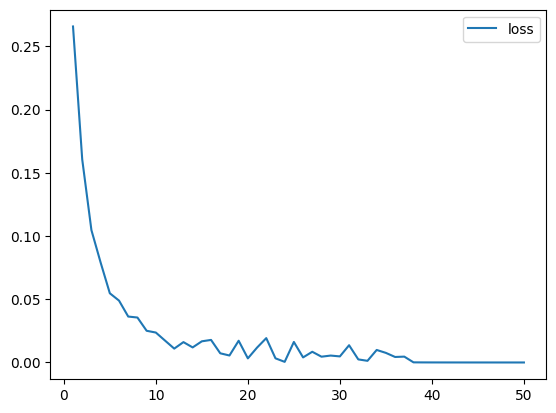

In [43]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

history_df.plot(y="loss")

<AxesSubplot:>

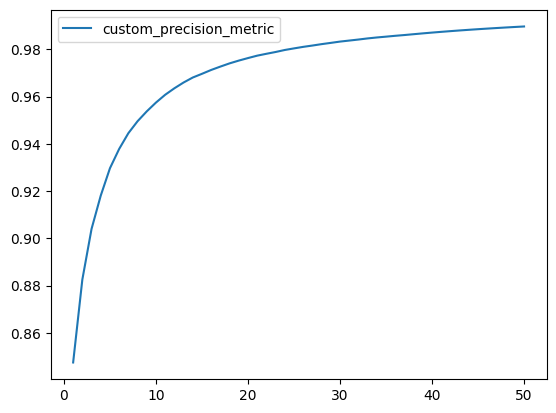

In [44]:
# Plot the accuracy
history_df.plot(y="custom_precision_metric")

In [45]:
import numpy as np
# 1. Make predictions on the test set
y_pred_prob = nn_model.predict(X_test)  # X_test is your test data

# 2. Convert predicted probabilities to predicted classes (for classification)
# For multiclass, use argmax to get the class with the highest probability
y_pred = np.argmax(y_pred_prob, axis=1)

# 3. Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred) 

22/22 [==============================] - 0s 4ms/step


2024-10-12 00:11:54.978789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [46]:
conf_matrix

array([[666,   0],
       [ 16,   0]])